In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [2]:
# obtain the exchage rate data from AKShare, which is an elegant and simple financial data interface library for Python
# using the API below, to access history trading data from the following website
# http://biz.finance.sina.com.cn/forex/forex.php?startdate=2012-01-01&enddate=2021-06-14&money_code=EUR&type=0
exchange_rate_orign_df = ak.currency_boc_sina(symbol="加拿大元", start_date="20190101", end_date="20231115")

In [3]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates = exchange_rate_orign_df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )

In [4]:
exchange_rates.set_index(exchange_rates['date'], inplace=True)
exchange_rates

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
date,,,
2019-01-01,2019-01-01,505.91,502.21
2019-01-02,2019-01-02,505.35,501.65
2019-01-03,2019-01-03,510.20,506.46
2019-01-04,2019-01-04,511.09,507.35
2019-01-07,2019-01-07,515.00,511.23
...,...,...,...
2023-11-09,2023-11-09,531.69,528.15
2023-11-10,2023-11-10,528.62,525.10
2023-11-13,2023-11-13,530.17,526.64


In [5]:
selling_rates = exchange_rates['bank_buying_exchange_rate']
selling_rates.index = pd.to_datetime(selling_rates.index)

selling_rates

date
2019-01-01    502.21
2019-01-02    501.65
2019-01-03    506.46
2019-01-04    507.35
2019-01-07    511.23
               ...  
2023-11-09    528.15
2023-11-10    525.10
2023-11-13    526.64
2023-11-14    526.79
2023-11-15    528.93
Name: bank_buying_exchange_rate, Length: 1270, dtype: float64

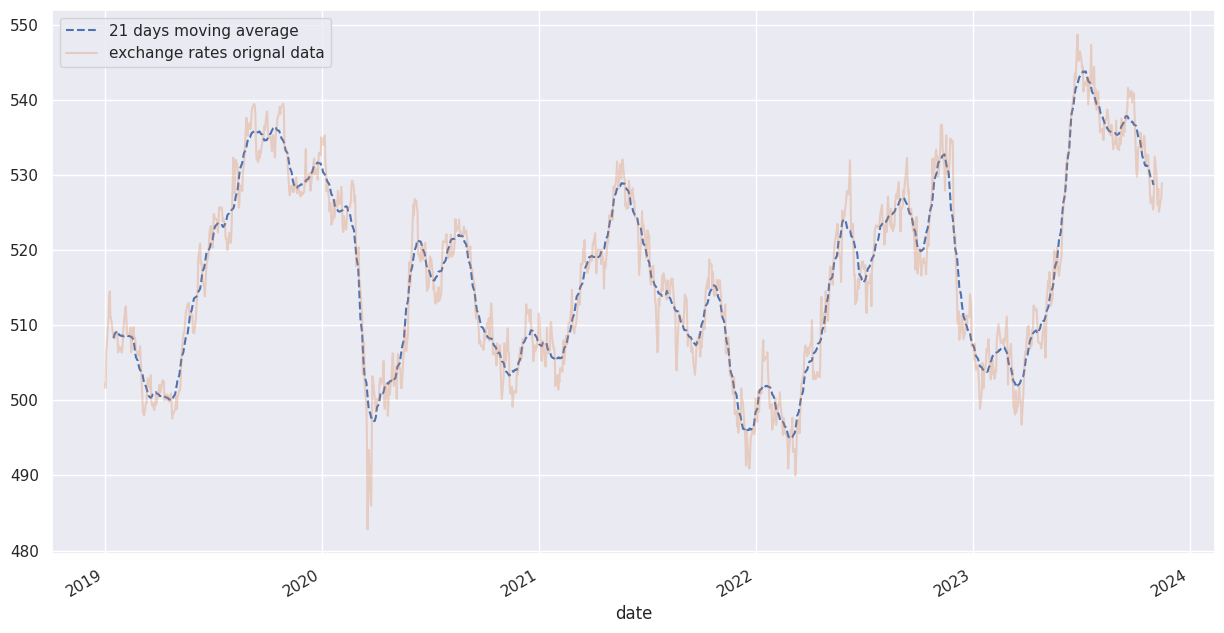

In [6]:
window = 21
selling_rates.rolling(window, center=True).mean().plot(style='--', label=f'{window} days moving average', figsize=(15, 8))
selling_rates.plot(alpha=0.3, style='-', label = 'exchange rates orignal data')
plt.legend()

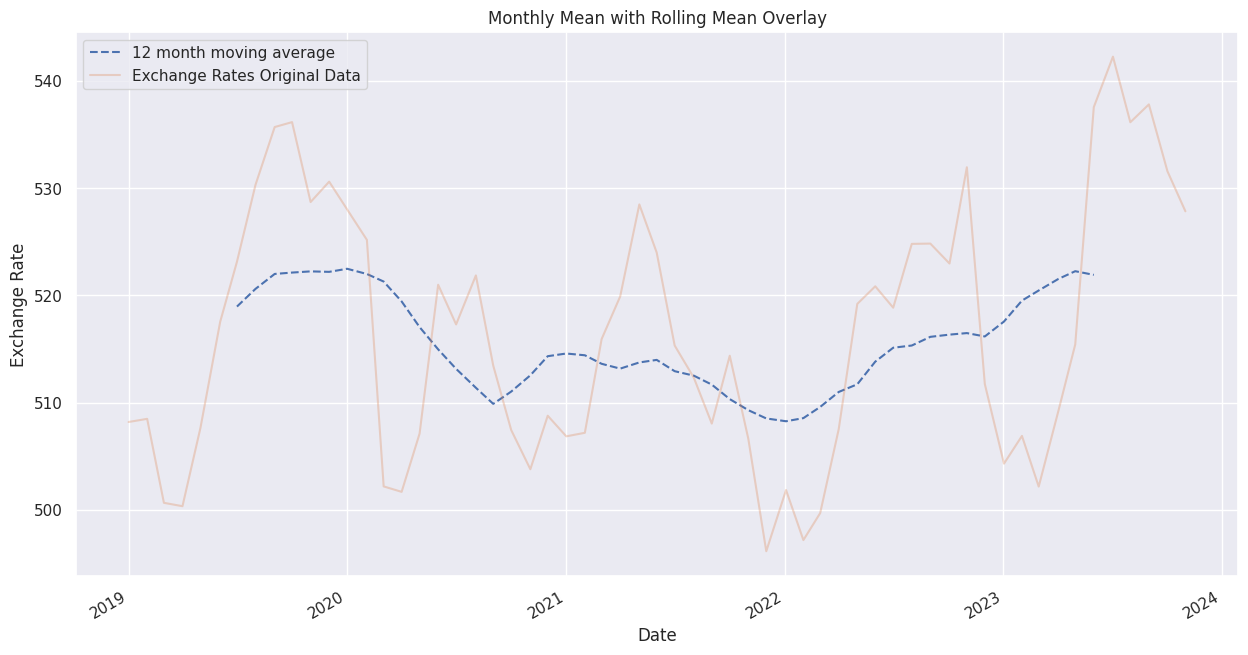

In [7]:
plt.figure(figsize=(15, 8))
selling_rates.resample('BMS').mean().rolling(window=12, center=True).mean().plot(style='--', label=f'12 month moving average')
selling_rates.resample('BMS').mean().plot(alpha=0.3, style='-', label = 'Exchange Rates Original Data')

plt.title('Monthly Mean with Rolling Mean Overlay')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [8]:
help(selling_rates.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'int | dt.timedelta | str | BaseOffset | BaseIndexer', min_periods: 'int | None' = None, center: 'bool_t' = False, win_type: 'str | None' = None, on: 'str | None' = None, axis: 'Axis | lib.NoDefault' = <no_default>, closed: 'IntervalClosedType | None' = None, step: 'int | None' = None, method: 'str' = 'single') -> 'Window | Rolling' method of pandas.core.series.Series instance
    Provide rolling window calculations.

    Parameters
    ----------
    window : int, timedelta, str, offset, or BaseIndexer subclass
        Size of the moving window.

        If an integer, the fixed number of observations used for
        each window.

        If a timedelta, str, or offset, the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
        To learn more about the offsets & frequency strings, pl

In [9]:
mpl.rcParams.update({
    'figure.figsize': [15, 8]
})

In [67]:
selling_rates.resample('BMS').mean().rolling(window=12, center=True).mean()

date
2019-01-01           NaN
2019-02-01           NaN
2019-03-01           NaN
2019-04-01           NaN
2019-05-01           NaN
2019-06-03           NaN
2019-07-01    518.960801
2019-08-01    520.613445
2019-09-02    522.004695
2019-10-01    522.132338
2019-11-01    522.243862
2019-12-02    522.199887
2020-01-01    522.487451
2020-02-03    521.999951
2020-03-02    521.295013
2020-04-01    519.440511
2020-05-01    517.046752
2020-06-01    514.969411
2020-07-01    513.149796
2020-08-03    511.385744
2020-09-01    509.885994
2020-10-01    511.031015
2020-11-02    512.549879
2020-12-01    514.331307
2021-01-01    514.581421
2021-02-01    514.417430
2021-03-01    513.622331
2021-04-01    513.171460
2021-05-03    513.749169
2021-06-01    513.986272
2021-07-01    512.932903
2021-08-02    512.515522
2021-09-01    511.681605
2021-10-01    510.328779
2021-11-01    509.297399
2021-12-01    508.524026
2022-01-03    508.261716
2022-02-01    508.555639
2022-03-01    509.595983
2022-04-01    510.99

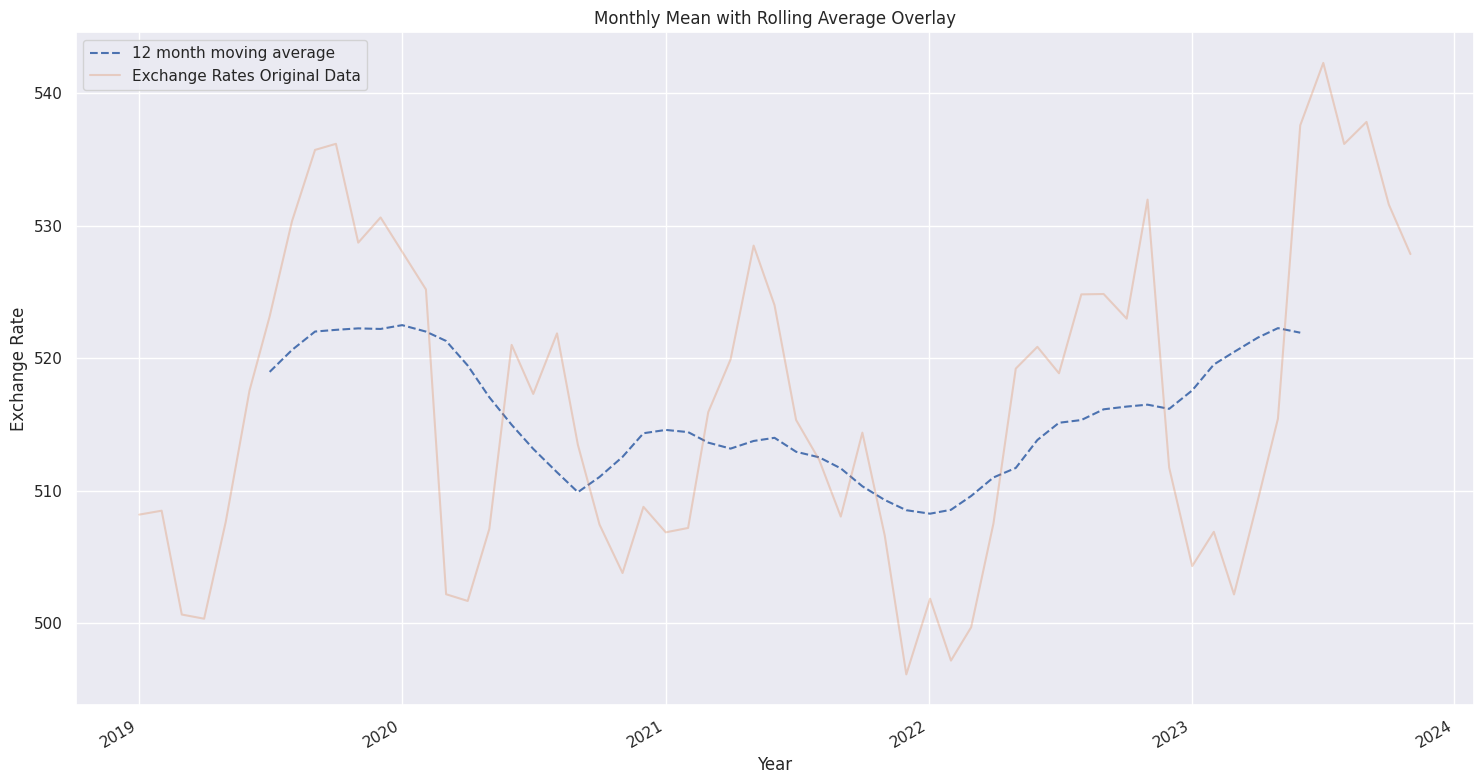

In [49]:
selling_rates.resample('BMS').mean().rolling(window=12, center=True).mean().plot(style='--', label=f'12 month moving average')
selling_rates.resample('BMS').mean().plot(alpha=0.3, style='-', label = 'Exchange Rates Original Data')

plt.title('Monthly Mean with Rolling Average Overlay')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()
plt.show()

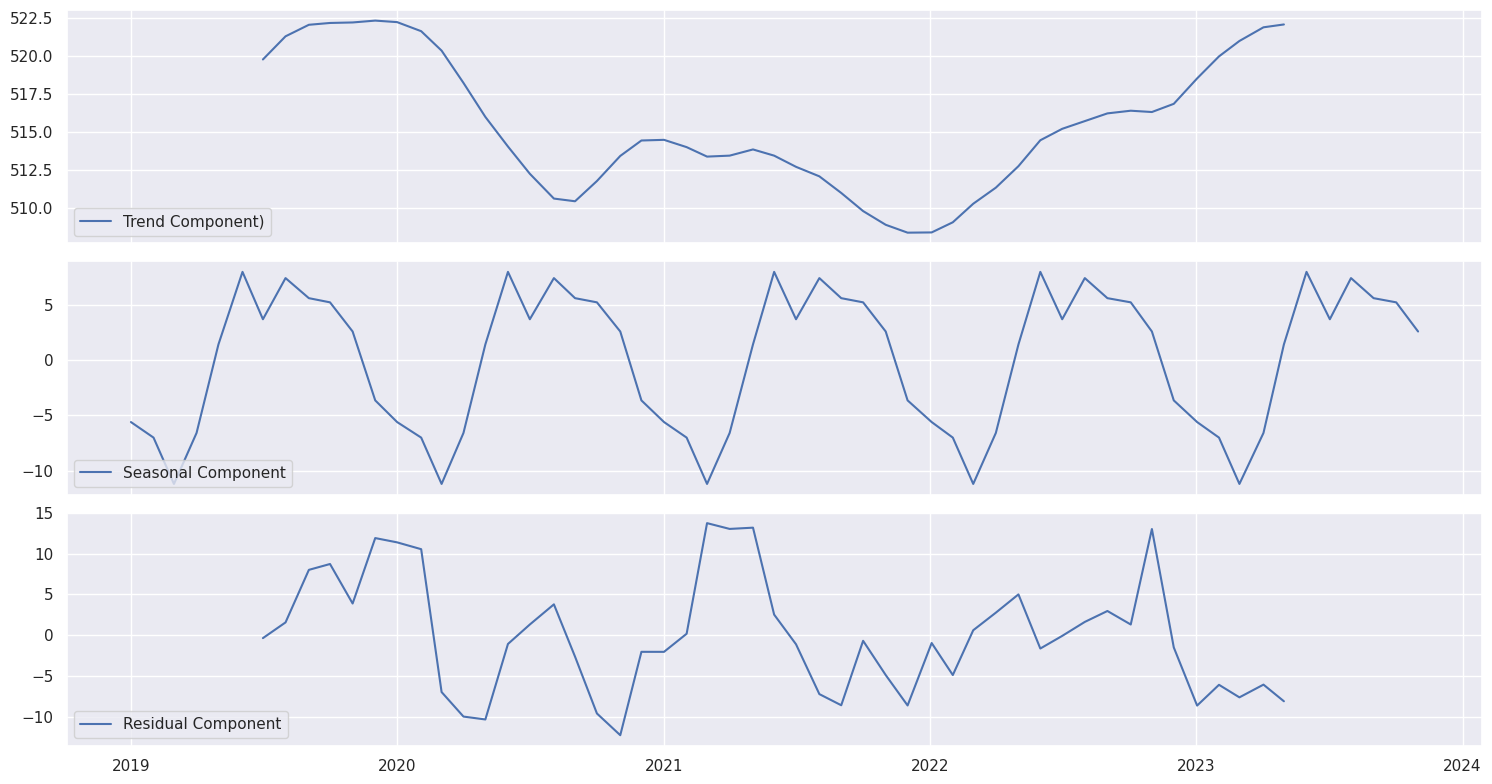

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(selling_rates.resample('BMS').mean(), model='additive', period=12)

# subplot trend(moving average above), seasonal, residual component
fig, axs = plt.subplots(3, 1, sharex=True)

# Trend component from seasonal decomposition
axs[0].plot(result.trend, label='Trend Component)')
axs[0].legend(loc='lower left') 

# Seasonal component
axs[1].plot(result.seasonal, label='Seasonal Component')
axs[1].legend(loc='lower left')

# Residual component
axs[2].plot(result.resid, label='Residual Component')
axs[2].legend(loc='lower left')
plt.tight_layout()
plt.show()


In [27]:
result.resid

date
2019-01-01          NaN
2019-02-01          NaN
2019-03-01          NaN
2019-04-01          NaN
2019-05-01          NaN
2019-06-03          NaN
2019-07-01    -0.354127
2019-08-01     1.571216
2019-09-02     8.014639
2019-10-01     8.733133
2019-11-01     3.888320
2019-12-02    11.912873
2020-01-01    11.387054
2020-02-03    10.550237
2020-03-02    -6.967346
2020-04-01    -9.974473
2020-05-01   -10.329030
2020-06-01    -1.071696
2020-07-01     1.315226
2020-08-03     3.785154
2020-09-01    -2.629374
2020-10-01    -9.594312
2020-11-02   -12.258494
2020-12-01    -2.035198
2021-01-01    -2.037304
2021-02-01     0.180838
2021-03-01    13.743777
2021-04-01    13.035208
2021-05-03    13.188473
2021-06-01     2.529684
2021-07-01    -1.109101
2021-08-02    -7.218731
2021-09-01    -8.586517
2021-10-01    -0.684444
2021-11-01    -4.883376
2021-12-01    -8.612139
2022-01-03    -0.955127
2022-02-01    -4.882092
2022-03-01     0.611098
2022-04-01     2.765212
2022-05-02     5.008326
2022-06-01 

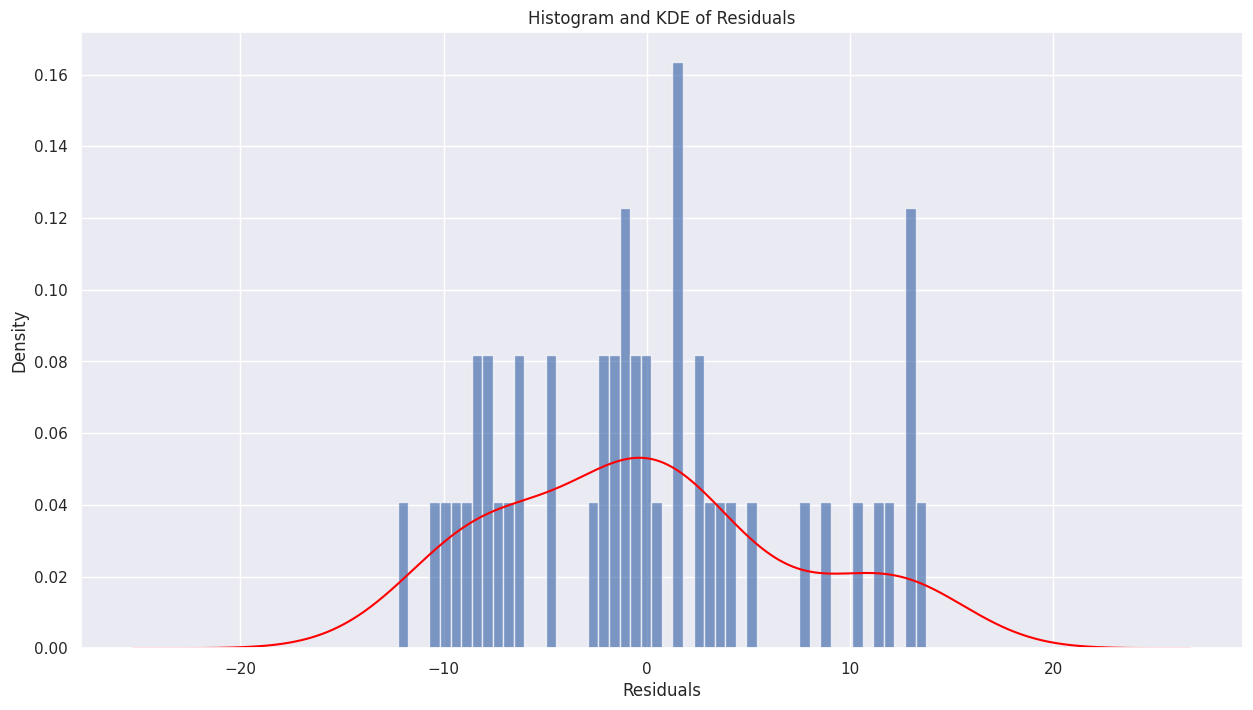

In [29]:
result.resid.plot(kind='hist', bins=50, density=True, alpha=0.7)
result.resid.plot(kind='kde', color='red')
plt.title('Histogram and KDE of Residuals')
plt.xlabel('Residuals')
plt.show()

### The residual component in the seasonal decomposition is larger than the seasonal component, it suggests that there are unexplained patterns or variations in the exchange rates time series that are not captured by the seasonal or trend components of the decomposition.

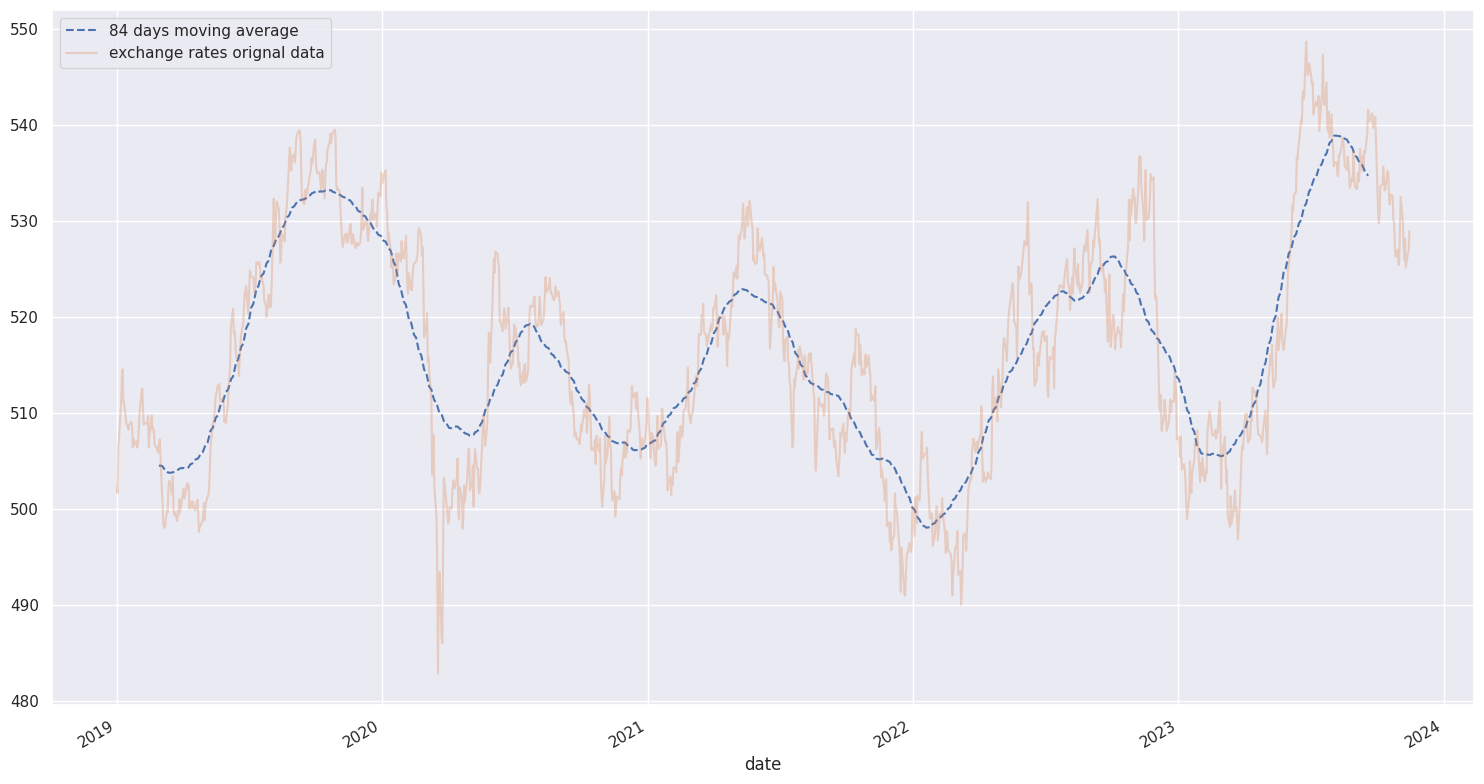

In [53]:
window = 21*4
selling_rates.rolling(window, center=True).mean().plot(style='--', label=f'{window} days moving average', figsize=(15, 8))
selling_rates.plot(alpha=0.3, style='-', label = 'exchange rates orignal data')
plt.tight_layout()
plt.legend()

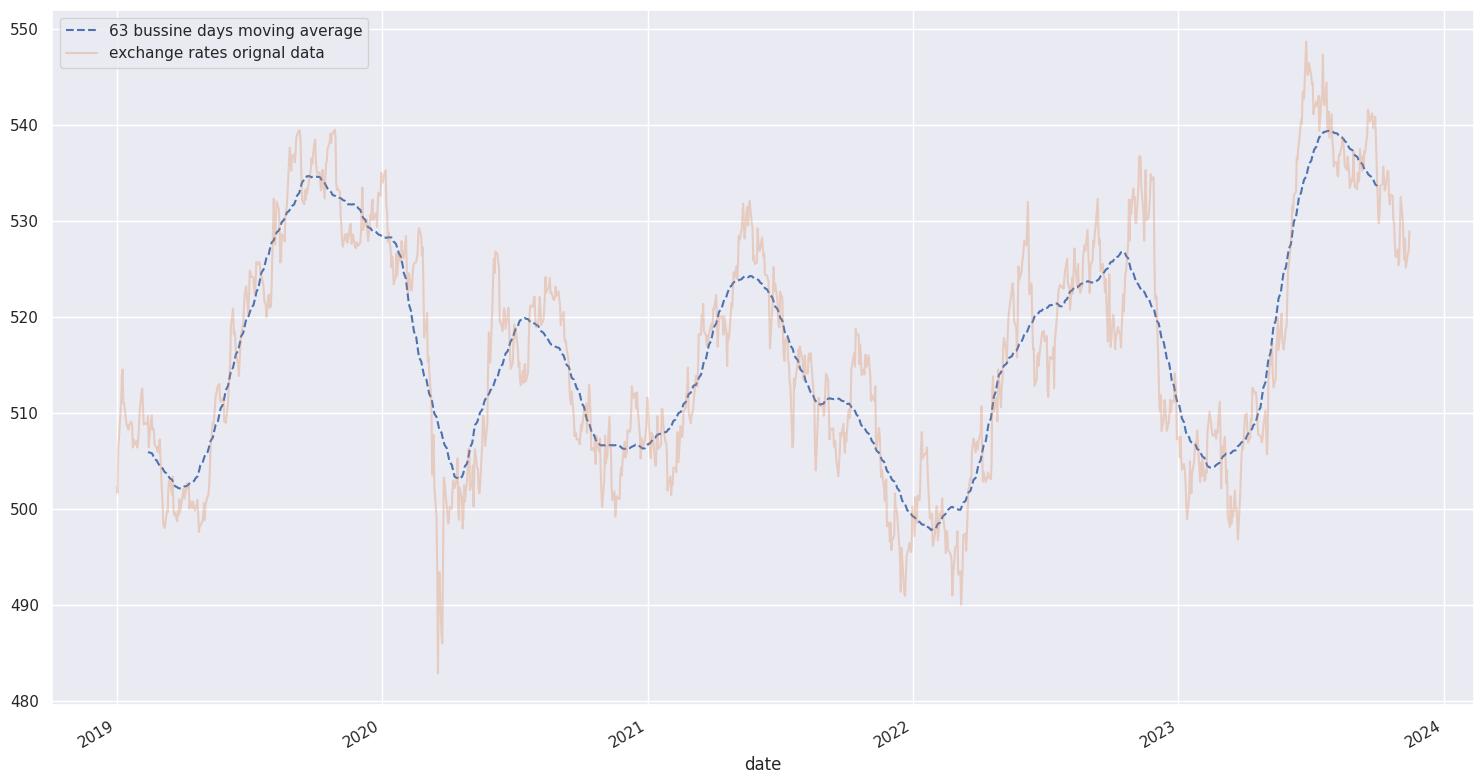

In [64]:
window = 21*3
selling_rates.rolling(window, center=True).mean().plot(style='--', label=f'{window} bussine days moving average')
selling_rates.plot(alpha=0.3, style='-', label = 'exchange rates orignal data')
plt.tight_layout()
plt.legend()

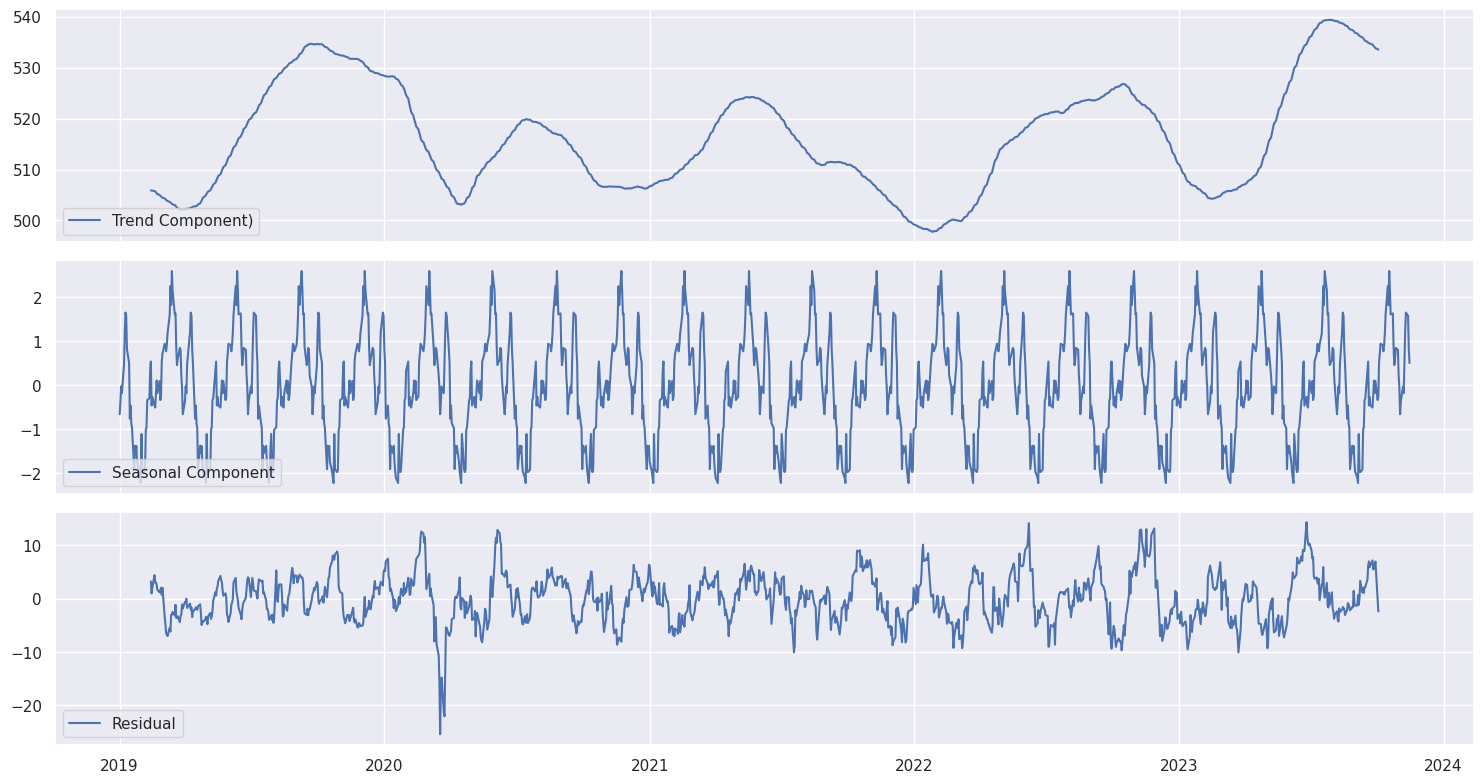

In [65]:
result = seasonal_decompose(selling_rates, model='additive', period=window)

# Plotting
fig, axs = plt.subplots(3, 1, sharex=True)

# Trend component from seasonal decomposition
axs[0].plot(result.trend, label='Trend Component)')
axs[0].legend(loc='lower left') 

# Seasonal component
axs[1].plot(result.seasonal, label='Seasonal Component')
axs[1].legend(loc='lower left')

axs[2].plot(result.resid, label='Residual')
axs[2].legend(loc='lower left')
plt.tight_layout()
plt.show()
